In [1]:
import numpy as np
import nmrglue as nmrglue
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Important Acqus Parameters
AQ=.5992560 # Acquistion time (s)
SWH=725.9 #Spectral Width [Hz]
SF=161.9755930 #Spectrometer frequency [Mhz]
SFO1=161.9744999 #Transmitter frequency [Mhz]

In [3]:
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\All_data_after_7_25\All_Dartmouth\adp\17")[1]
all_data = np.array(all_data)
print(len(all_data))
#print(all_data.shape)

512


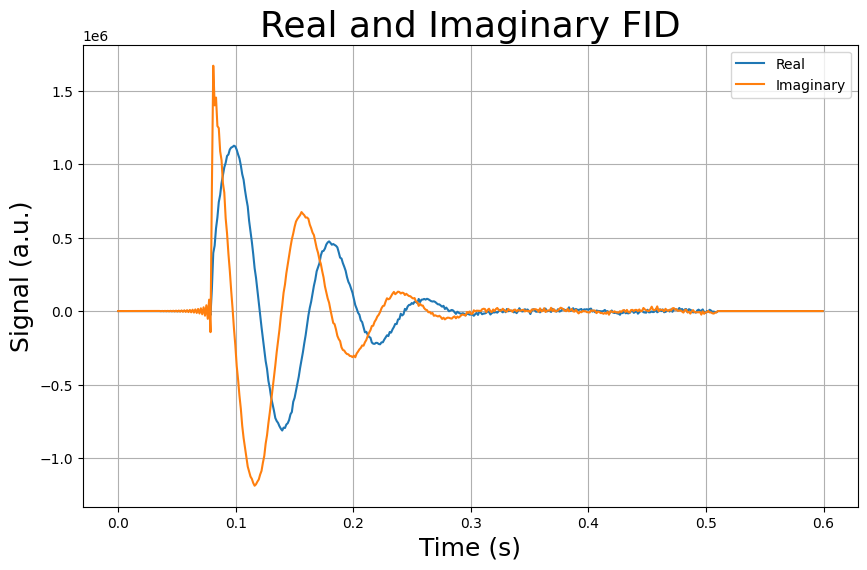

In [4]:
# Create a DataFrame with real, imaginary, and time values
time = np.linspace(0, AQ, len(all_data.real))
df = pd.DataFrame({
    "Time": time,
    "Real": all_data.real,
    "Imaginary": all_data.imag
})

# Plot Real and Imaginary FID on the same plot
plt.figure(figsize=(10, 6))
plt.plot(df["Time"], df["Real"], label="Real")
plt.plot(df["Time"], df["Imaginary"], label="Imaginary")
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Signal (a.u.)', fontsize=18)
plt.title('Real and Imaginary FID', fontsize=26)
plt.legend()
plt.grid(True)
plt.show()

## FT of Raw Data
###### nmrglue has two types of FT "rft" (real fourier transform) and "fft" (Fourier transform, NMR ordering of results)

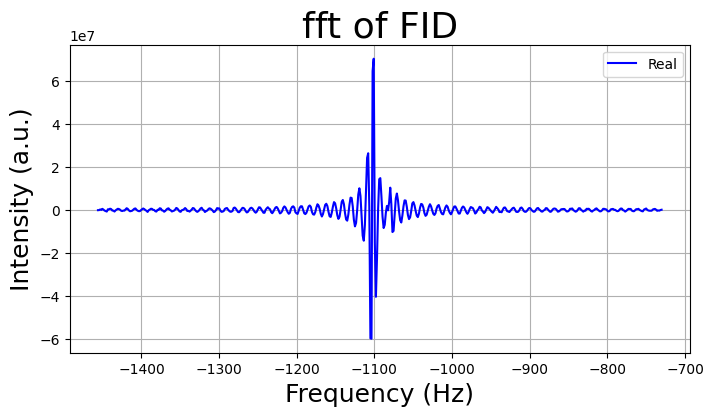

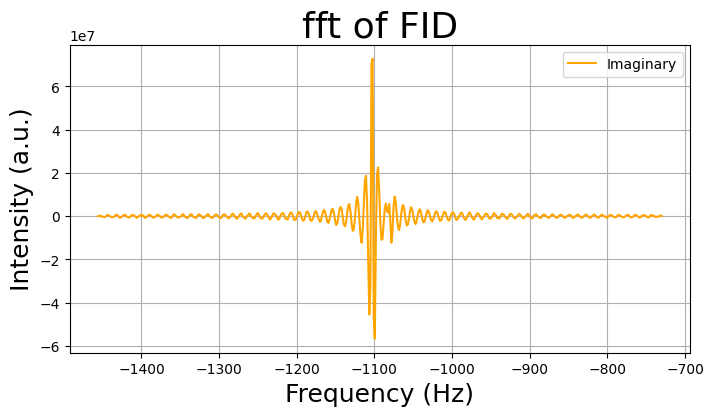

In [5]:
spectrum = nmrglue.proc_base.fft(all_data) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(freq, np.imag(spectrum), label="Imaginary", color='orange')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-500,500)
plt.show()

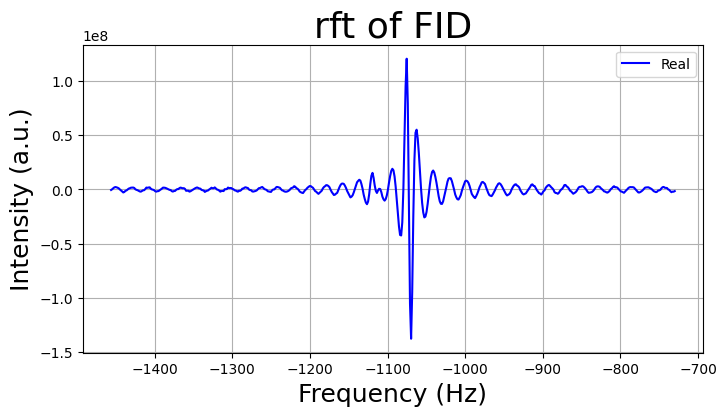

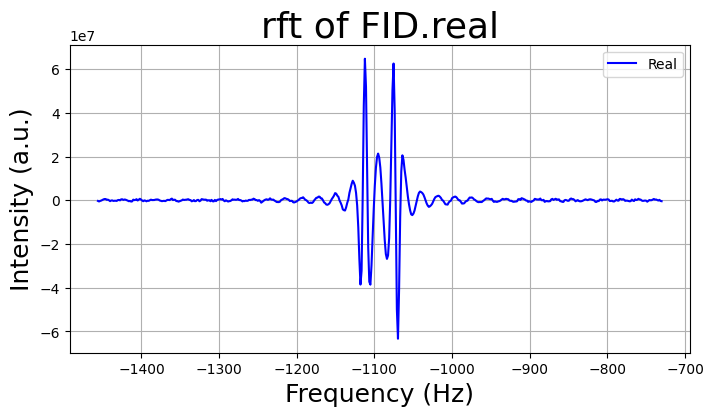

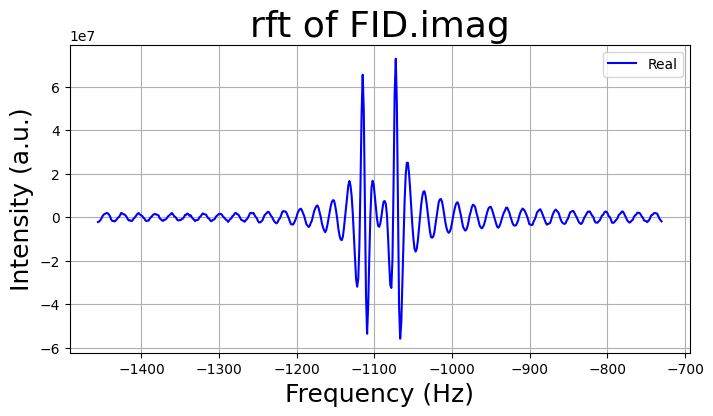

In [6]:
spectrum = nmrglue.proc_base.rft(all_data) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()



spectrum = nmrglue.proc_base.rft(all_data.real) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID.real", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()


spectrum = nmrglue.proc_base.rft(all_data.imag) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID.imag", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()

## Next we will process data ourselves and try to figure out how Bruker auto-processes

###### Apply exponential apodiziation, and ls shift. (Zero filling seems unneccesary because of exponential apodization)

In [58]:
#phase shift
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\All_data_after_7_25\All_Dartmouth\adp\17")[1]
all_data = np.array(all_data)
#print(all_data.shape)
#all_data=nmrglue.proc_base.ps(all_data, p0=146.320, p1=-115.469)
all_data=nmrglue.proc_base.ps(all_data, p0=270, p1=0)
time = np.linspace(0, AQ, len(all_data.real))

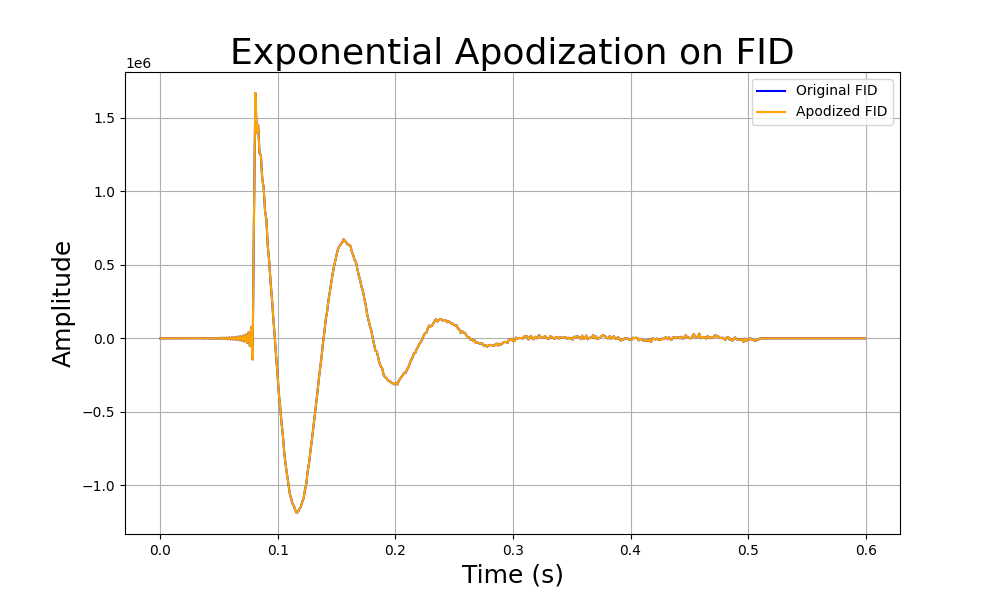

In [59]:
# Apply exponential apodization
apodized_data = nmrglue.proc_base.em(all_data, .0003)
#*********this function can only take real part and not full complex part. Do we want to edit this way?

#*******TURNING THIS OFF FOR NOW
apodized_data = all_data
#*******


plt.figure(figsize=(10, 6))
plt.plot(time, all_data, label="Original FID", color="blue")
plt.plot(time, apodized_data, label="Apodized FID", color="orange")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Amplitude", fontsize=18)
plt.title("Exponential Apodization on FID", fontsize=26)
plt.legend()
plt.grid(True)
plt.show()


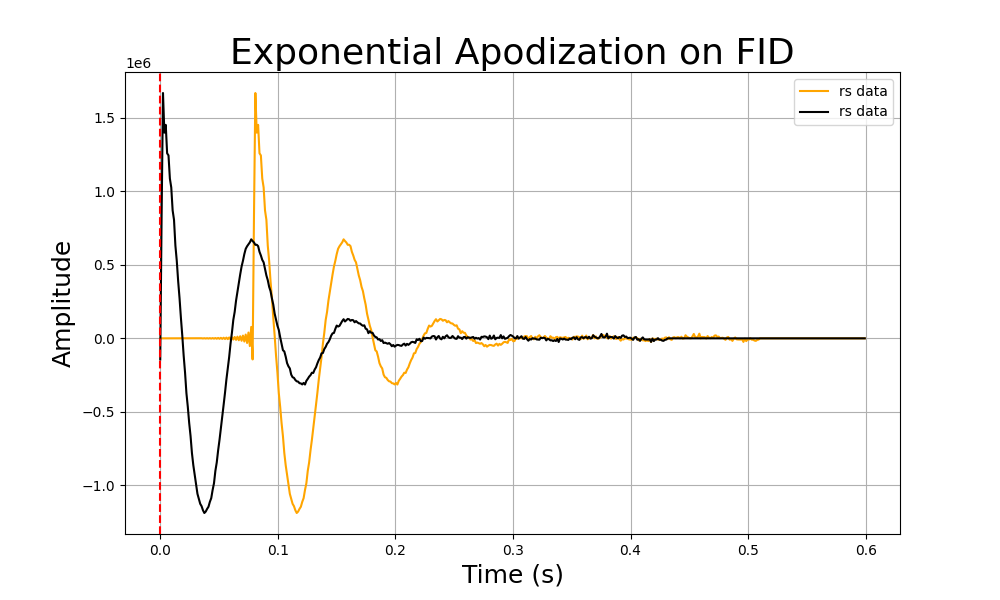

In [60]:
ls_and_apodized_data = nmrglue.proc_base.ls(apodized_data, 67)
# Plot the results
plt.figure(figsize=(10, 6))
time=np.linspace(0, AQ, len(all_data.real))
plt.plot(time, apodized_data, label="rs data", color="orange")
plt.plot(time, ls_and_apodized_data, label="rs data", color="black")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Amplitude", fontsize=18)
plt.title("Exponential Apodization on FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-.01,.1)
plt.axvline(x=0, color='red', linestyle='--', label="x = 0")
plt.show()


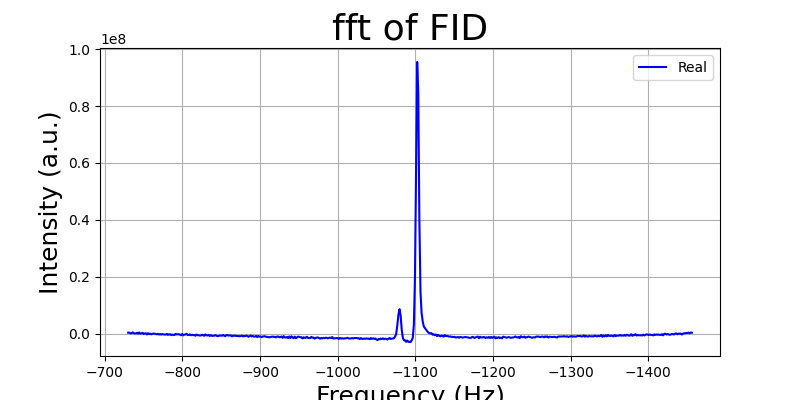

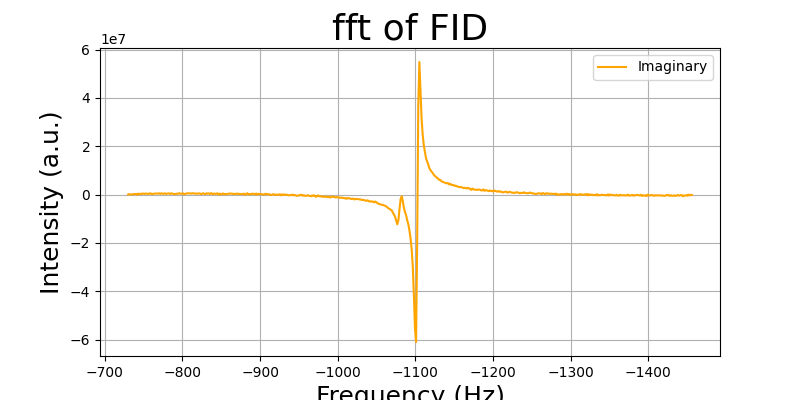

In [63]:
spectrum = nmrglue.proc_base.fft(ls_and_apodized_data) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-1475,-1250)
#plt.xlim(-1330,-1390)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(freq, np.imag(spectrum), label="Imaginary", color='orange')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-1475,-1250)
plt.gca().invert_xaxis()
plt.show()

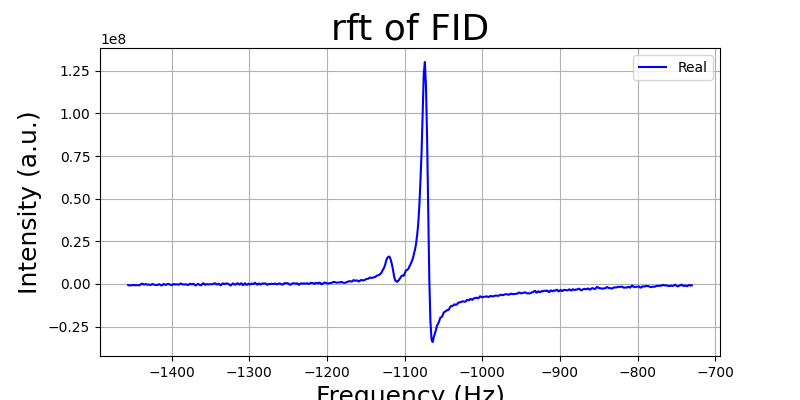

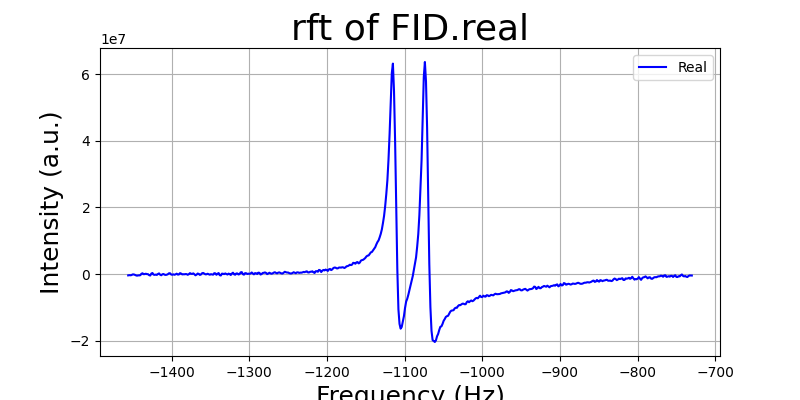

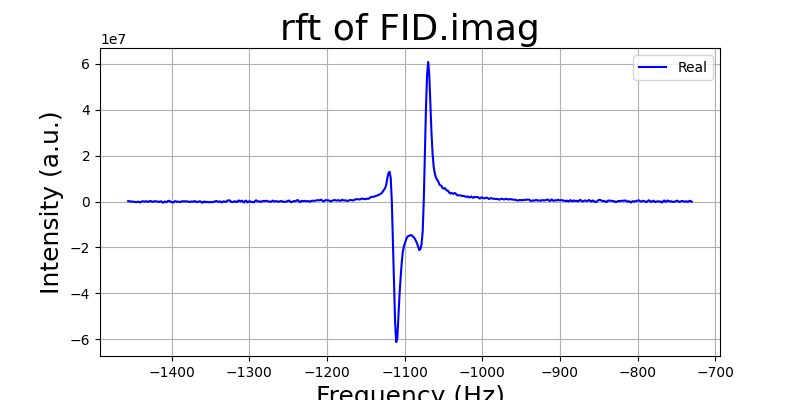

In [62]:
spectrum = nmrglue.proc_base.rft(ls_and_apodized_data) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()



spectrum = nmrglue.proc_base.rft(ls_and_apodized_data.real) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID.real", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()


spectrum = nmrglue.proc_base.rft(ls_and_apodized_data.imag) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID.imag", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()

In [34]:
%matplotlib widget

# Interactive manual phase correction widget
p0, p1 = nmrglue.process.proc_autophase.manual_ps(spectrum, notebook=True)

# Close the figure after manual correction
plt.close(fig)


interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phcorr0', max=3.141592653589793, …

TypeError: cannot unpack non-iterable NoneType object

# Phase Correction

In [ ]:
#auto

all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\MIT\ADP_Sample_134-12_3_2024\42")[1]
all_data = np.array(all_data)
all_data=nmrglue.process.proc_autophase.autops(all_data, "acme", p0=0.0, p1=0.0, return_phases=True)
display(all_data)

phased_data=all_data[0]
# Create a DataFrame with real, imaginary, and time values
time = np.linspace(0, AQ, len(phased_data.real))
df = pd.DataFrame({
    "Time": time,
    "Real": phased_data.real,
    "Imaginary": phased_data.imag
})

# Plot Real and Imaginary FID on the same plot
plt.figure(figsize=(10, 6))
plt.plot(df["Time"], df["Real"], label="Real")
plt.plot(df["Time"], df["Imaginary"], label="Imaginary")
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Signal (a.u.)', fontsize=18)
plt.title('Real and Imaginary FID', fontsize=26)
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#manual

In [ ]:
#Code for padding
"""
n_1=10000
padded_array = np.pad(all_data, (0, n_1), mode='constant', constant_values=0)

# Plot the results
plt.figure(figsize=(10, 6))
time=np.linspace(0, AQ, len(all_data.real)+n_1)
plt.plot(time, padded_array , label="rs data", color="orange")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Amplitude", fontsize=18)
plt.title("Exponential Apodization on FID", fontsize=26)
plt.legend()
plt.grid(True)
plt.show()
"""